In [30]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

In [31]:
iris = load_iris ()
X = iris.data
y = iris.target
V=X[:,0:3:2]


In [39]:
dtr_1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=3)
dtr_1.fit(V,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

(0.0, 8.0)

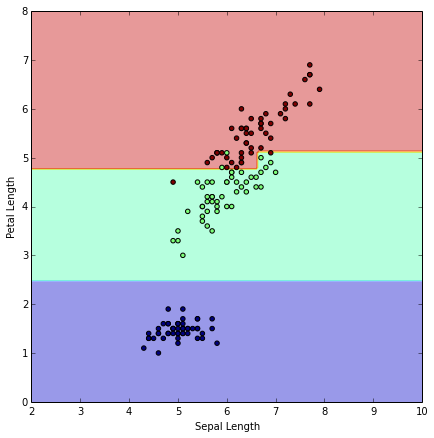

In [40]:
xx,yy = np.meshgrid(np.linspace(0.0,10.0,201),np.linspace(0.0,10.0,201))
predict = dtr_1.predict(np.c_[xx.ravel(),yy.ravel()])
Z = predict.reshape(np.shape(xx))
plt.figure(figsize=(7,7))
plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(V.T[0],V.T[1],c=y)
plt.axis('scaled')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.xlim(2.0,10.0)
plt.ylim(0.0,8.0)


In [41]:
import pydot
from sklearn.externals.six import StringIO

dot_data = StringIO()
f = tree.export_graphviz(dtr_1,out_file=dot_data,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('iris_2.pdf')

True